<a href="https://colab.research.google.com/github/MiguelGoes/MVP1/blob/main/C%C3%B3pia_de_Trabalho_1_MVP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definição da situação problema

---




1° trabalho: MVP:Analise de dados de um dataset para pré-processamento dos dados e apresentação das principais características.

Situação problema:

 O problema é avaliar as melhores ações para investir tentando minimizar os riscos de perdas utilizando dados coletados dos pregões realizados em um intervalo de tempo.

 Método de análise: Utilizando o histórico dos valores das ações negociadas na bolsa de valores do Brasil (B3) encontrar os papeis que apresente crescimento constante e sustentável ao longo dos anos. Dados: Utilizados: Ações Brasileiras entre 2018 e 2021. Preços de 376 ações contendo setores da Bolsa

Link para acesso: https://www.kaggle.com/datasets/lucasprado/acoesbrasileiras2018a2021

#  Carregamento dos dados

In [31]:
# 1° passo: Importação da biblioteca pandas
import pandas as pd

 Depois de pesquisas em base de dados recomendadas durante as aulas, escolhi o dataset *Ações Brasileiras entre 2018 e 2021*, esse dataset contem valores das ações de empresas possuem capital aberto na Ibovespa (B3), . O dataset pode ser acessado pelo link:
  https://www.kaggle.com/datasets/lucasprado/acoesbrasileiras2018a2021.
  Por questão de praticidade o arquivo foi carregado no drive com o nome "acoes.xlsx" e pode ser acessado por:
  https://raw.githubusercontent.com/MiguelGoes/MVP1/main/ACOES.xlsx
   Esse dataset possui os seguinte dados:

    1- Preço da ação na abertura do pregão (Preco_abertura).
    2- Maior preço que a ação alcançou (Maior_preco).
    3- Menor preço que a ação alcançou (Menor_preco).
    4- Preço da ação na fechamento do pregão (Preco_fechamento).
    5- volume transacionado (volume).
    6- Preço ajustado (Preco_ajustado).
    7- Data de referência do dado (Data).
    8- Código da empresa na bolsa de valores  (Ticker).
    9- Variação do preço ajustado da ação entre o dia em analise e o dia anterior (Varia_ajustado_abertura).
    10- Variação do preço ajustado de fechamento da ação entre o dia em analise e o dia anterior (varia_ajustado_fecha).
    11- Nome da empresa em analise (Nome).
    12- Setor de atuação da empresa (Setor).
    13- Subsetor de atuação da empresa (Subsetor).
    14- Tipo da ação (Tipo) (1*BDR, 2*ORDINARIA, 3*PREFERENCIAL) 
    15 - classificação pelo o faturamento da empresa (Classificacao)(Mega cap, big cap, mid cap, small cap, micro cap, nano cap) .
    
    
   1* Ações BDRs (Brazilian Depositary Receipts) são certificados representativos de ações de empresas estrangeiras, negociados no Brasil. Um programa de BDR é o instrumento ideal para empresas estrangeiras estabelecerem presença no mercado de capitais mais dinâmico da América Latina.

   2* Ações ordinárias (ON) são aquelas que conferem direito a voto e participação nas decisões da companhia.

   3* Ações preferenciais (PN) são as que têm preferência no recebimento de proventos, mas não dão direito ao voto.
  

Após a escolha do dataset realizei a importação e a nomeação dos atributos.



In [32]:
# importação dos dados utilizando que estão carregados no drive 
try:
    nomes_atributos =( ['Preco_abertura', 'Maior_preco', 'Menor_preco', 'Preco_fechamento', 'volume', 'Preco_ajustado',
                    'Data', 'Ticker', 'Varia_ajustado_abertura', 'varia_ajustado_fecha', 'Nome', 'Setor','Subsetor', 'Tipo', 
                    'Classificacao'])
    url = 'https://raw.githubusercontent.com/MiguelGoes/MVP1/main/ACOES.xlsx'
    dados=pd.read_excel(url, names = nomes_atributos)
    print('Dados carregados com sucesso')
except:
    print('Erro ao carregar dados, verifique o formato e local do arquivo')

Dados carregados com sucesso


# Veriicação dos dados

In [3]:
type(dados)

pandas.core.frame.DataFrame

 Uma vez os dados carregados, uma verificação é realizada para conferir os nomes e os tipos dos dados que estão presente em cada coluna, assim evitando a utilização dos dados de maneira errada.

In [4]:
from tabulate import tabulate

colunas = dados.columns
i=0
print('Nome das colunas\n')
print('Número da coluna     Nome da coluna              Tipo da variável dessa coluna')
for nomes in colunas:
    print('{:<20} {:<28} {}'. format(i+1, colunas[i], type(dados.dtypes[i])))
    i=i+1

Nome das colunas

Número da coluna     Nome da coluna              Tipo da variável dessa coluna
1                    Preco_abertura               <class 'numpy.dtype[float64]'>
2                    Maior_preco                  <class 'numpy.dtype[float64]'>
3                    Menor_preco                  <class 'numpy.dtype[float64]'>
4                    Preco_fechamento             <class 'numpy.dtype[float64]'>
5                    volume                       <class 'numpy.dtype[int64]'>
6                    Preco_ajustado               <class 'numpy.dtype[float64]'>
7                    Data                         <class 'numpy.dtype[datetime64]'>
8                    Ticker                       <class 'numpy.dtype[object_]'>
9                    Varia_ajustado_abertura      <class 'numpy.dtype[float64]'>
10                   varia_ajustado_fecha         <class 'numpy.dtype[float64]'>
11                   Nome                         <class 'numpy.dtype[object_]'>
12         

  Com os dados no formato esperado é também realizada a visualização das primeiras e das últimas linhas do dataset para verificar se existe algum equívoco na nomeação ou formato do dado.

In [5]:
dados.head(6)

,Preco_abertura,Maior_preco,Menor_preco,Preco_fechamento,volume,Preco_ajustado,Data,Ticker,Varia_ajustado_abertura,varia_ajustado_fecha,Nome,Setor,Subsetor,Tipo,Classificacao
0,14.94,15.16,14.70,14.89,94500,14.74,2018-01-02,AALR3.SA,NaN,NaN,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap
1,14.89,15.32,14.79,14.96,584700,14.81,2018-01-03,AALR3.SA,0.004701,0.004701,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap
2,15.00,15.16,14.81,15.09,290100,14.94,2018-01-04,AALR3.SA,0.008690,0.008690,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap
3,15.05,15.17,14.95,15.05,131500,14.90,2018-01-05,AALR3.SA,-0.002651,-0.002651,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap
4,15.05,15.10,14.62,14.79,244500,14.64,2018-01-08,AALR3.SA,-0.017276,-0.017276,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap
5,14.87,14.87,14.50,14.65,64200,14.50,2018-01-09,AALR3.SA,-0.009466,-0.009466,ALLIAR,Saúde,Análises e Diagnósticos,Ordinaria,Small Cap


In [6]:
dados.tail(6)

,Preco_abertura,Maior_preco,Menor_preco,Preco_fechamento,volume,Preco_ajustado,Data,Ticker,Varia_ajustado_abertura,varia_ajustado_fecha,Nome,Setor,Subsetor,Tipo,Classificacao
298855,27.37,27.65,26.85,27.00,2901800,27.00,2021-03-23,YDUQ3.SA,-0.023861,-0.023861,YDUQS PART,Consumo Cíclico,Diversos,Ordinaria,Mid Cap
298856,27.00,28.00,26.70,26.71,2806700,26.71,2021-03-24,YDUQ3.SA,-0.010741,-0.010741,YDUQS PART,Consumo Cíclico,Diversos,Ordinaria,Mid Cap
298857,26.81,27.73,26.26,27.73,2433000,27.73,2021-03-25,YDUQ3.SA,0.038188,0.038188,YDUQS PART,Consumo Cíclico,Diversos,Ordinaria,Mid Cap
298858,27.64,27.75,26.60,27.09,1801000,27.09,2021-03-26,YDUQ3.SA,-0.023080,-0.023080,YDUQS PART,Consumo Cíclico,Diversos,Ordinaria,Mid Cap
298859,26.89,27.24,26.43,26.71,1223600,26.71,2021-03-29,YDUQ3.SA,-0.014027,-0.014027,YDUQS PART,Consumo Cíclico,Diversos,Ordinaria,Mid Cap
298860,26.66,28.30,26.55,28.04,2396200,28.04,2021-03-30,YDUQ3.SA,0.049794,0.049794,YDUQS PART,Consumo Cíclico,Diversos,Ordinaria,Mid Cap


Agora começaremos a realizar as primeiras análises dos dados, Verificado se todos os dados foram carregados, para isso conferimos a quantidade de linhas em cada coluna do dataset.


In [7]:
quant = dados.count()
print('Quantidade de dado de cada coluna \n\n{}'.format(quant))
print('Formato dos dados {}'.format(dados.shape))

Quantidade de dado de cada coluna 

Preco_abertura             298861
Maior_preco                298861
Menor_preco                298861
Preco_fechamento           298861
volume                     298861
Preco_ajustado             298861
Data                       298861
Ticker                     298861
Varia_ajustado_abertura    298486
varia_ajustado_fecha       298486
Nome                       298861
Setor                      298861
Subsetor                   298861
Tipo                       298861
Classificacao              298861
dtype: int64
Formato dos dados (298861, 15)


 Comparando com a planilha do excel é possível perceber que todas as linhas do arquivo foram carregadas.

 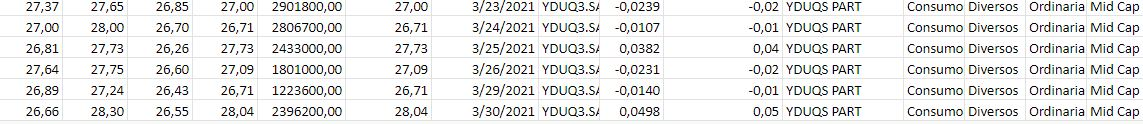

# Tratando dados faltantes

 Ao verificar o resultado acima é possível perceber que nos campos " varia_ajustado_abertura" e varia_ajustado_fecha"  o número de linhas está diferente dos demais. Vamos verificar se nessas colunas existem dados faltantes e quantos são.

Varia_ajustado_abertura    375
varia_ajustado_fecha       375
Preco_abertura               0
Maior_preco                  0
Menor_preco                  0
Preco_fechamento             0
volume                       0
Preco_ajustado               0
Data                         0
Ticker                       0
Nome                         0
Setor                        0
Subsetor                     0
Tipo                         0
Classificacao                0
dtype: int64

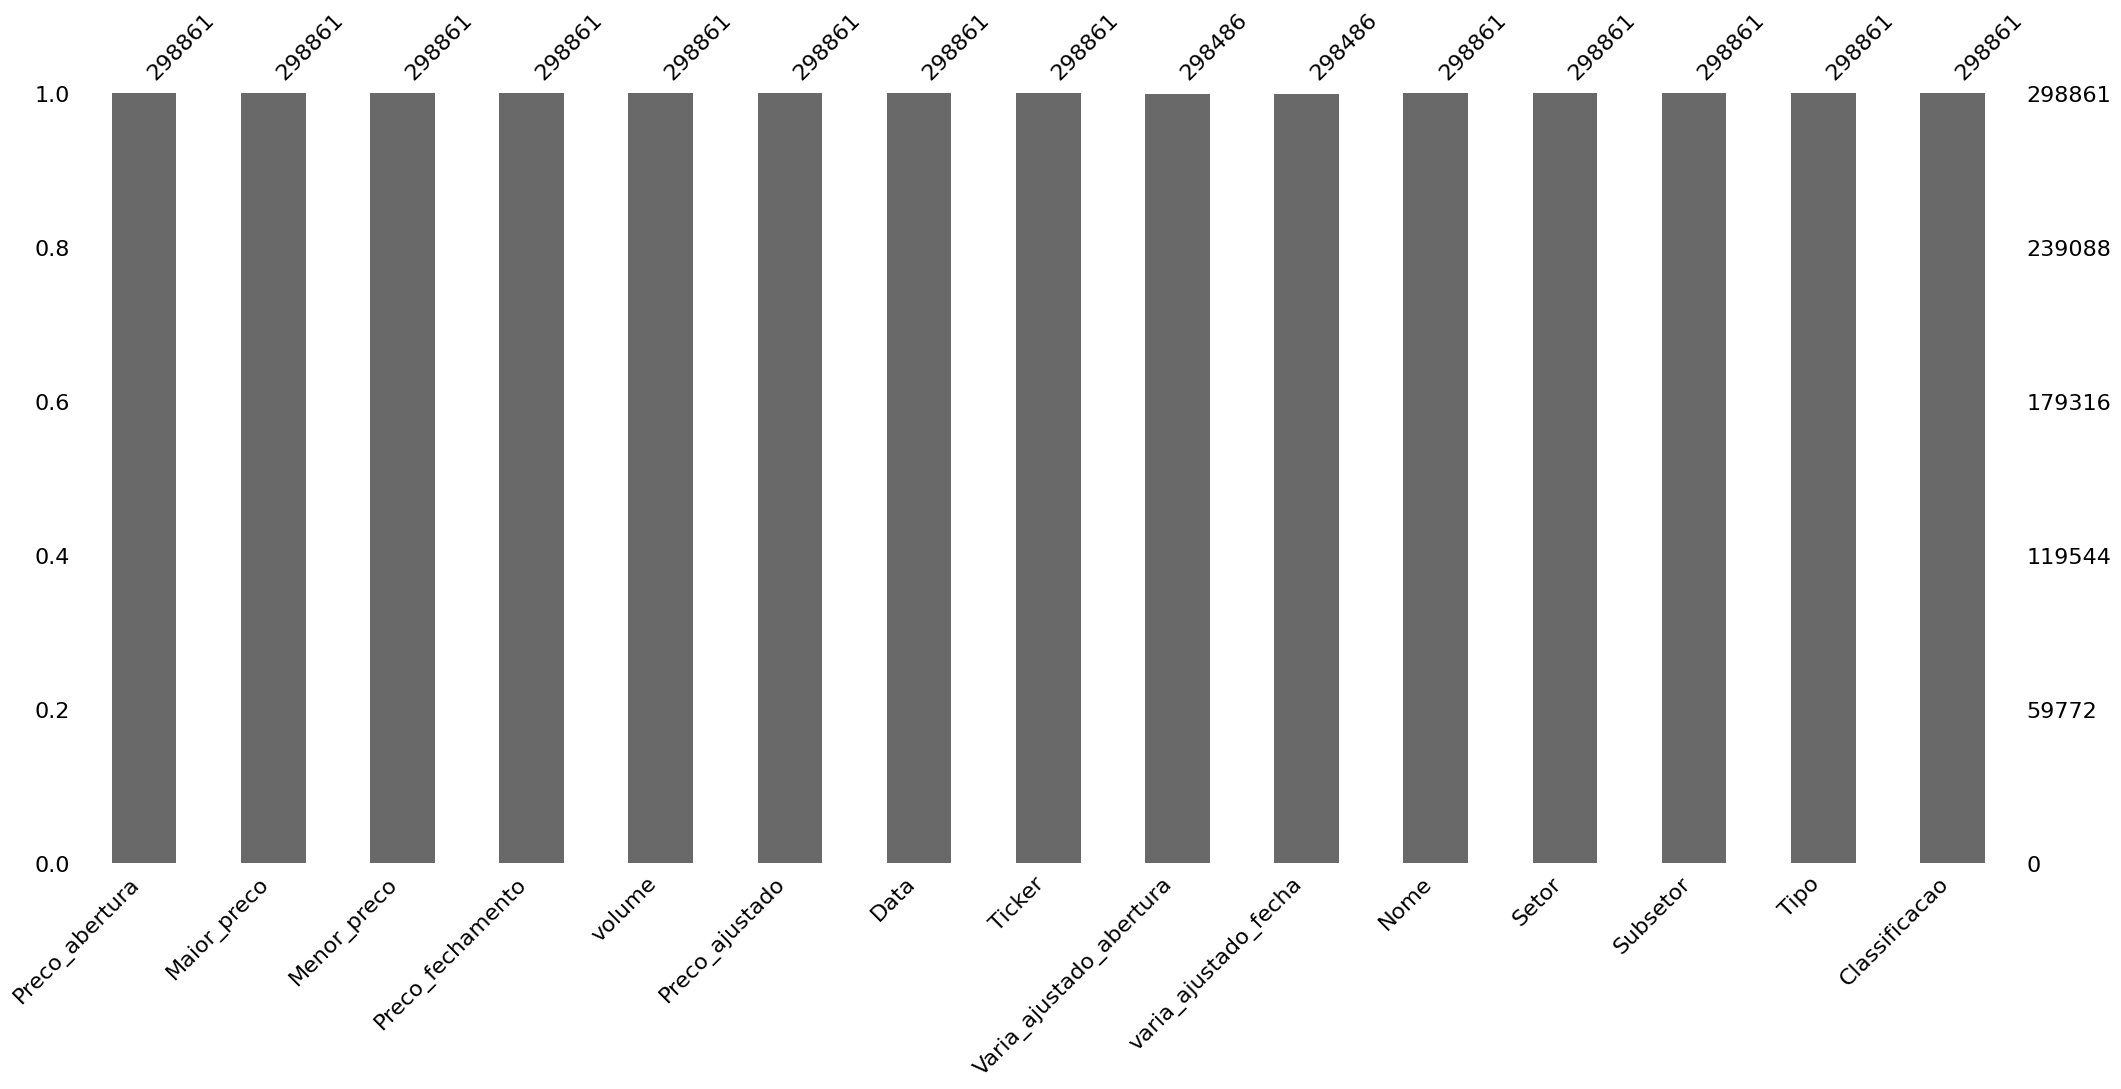

In [8]:
import missingno as msno
msno.bar(dados);
dados.isnull().sum().sort_values(ascending=False)

 Como suspeitado nos dois campos existem 375 valores faltantes.
 Vamos verificar em quais linhas esses valores estão.

In [9]:
a = dados[dados.isnull().any(axis=1)]
print(a)
print(a.iloc[0, 0])

        Preco_abertura  Maior_preco  Menor_preco  Preco_fechamento    volume  \
0                14.94        15.16        14.70             14.89     94500   
797              16.71        16.73        16.44             16.46    328681   
1594             21.33        21.75        21.17             21.69  12717900   
2391              4.98         4.98         4.98              4.98      1000   
3188             12.45        12.80        12.40             12.67     39100   
...                ...          ...          ...               ...       ...   
294876           11.79        12.46        11.79             12.15    566200   
295673            7.40         7.40         7.40              7.40         0   
296470            5.25         5.25         5.00              5.01      3800   
297267           40.00        40.00        40.00             40.00         0   
298064           32.65        34.09        32.65             33.87   2677200   

        Preco_ajustado       Data     T

  Verificando quantas ações diferentes são negociadas na bolsa temos o seguinte número.

In [10]:
num_empresas=dados['Ticker'].nunique()
print ('Número de ações negociadas na bolsa de valores é {}'.format(num_empresas))

Número de ações negociadas na bolsa de valores é 375


 Como o número de ações é o mesmo de itens faltantes em cada coluna a possível falta de valores pode ser devido a forma de calcular esses valores.
 Os valores de "Varia_ajustado_abertura" e " varia_ajustado_fecha " são calculados com base no valor de "Preco_ajustado" e "Preco_fechamento" do dia atual e do dia anterior, como não existe valor coletado antes do dia 2 de janeiro de 2018 esses valores não podem ser computados, por isso essas linhas serão excluidas.
 
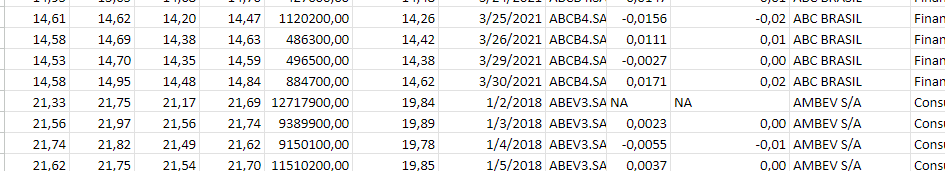

In [11]:
dados=dados.dropna()

 Verificando se as linhas com dados nulos foram excluidas

Preco_abertura             0
Maior_preco                0
Menor_preco                0
Preco_fechamento           0
volume                     0
Preco_ajustado             0
Data                       0
Ticker                     0
Varia_ajustado_abertura    0
varia_ajustado_fecha       0
Nome                       0
Setor                      0
Subsetor                   0
Tipo                       0
Classificacao              0
dtype: int64

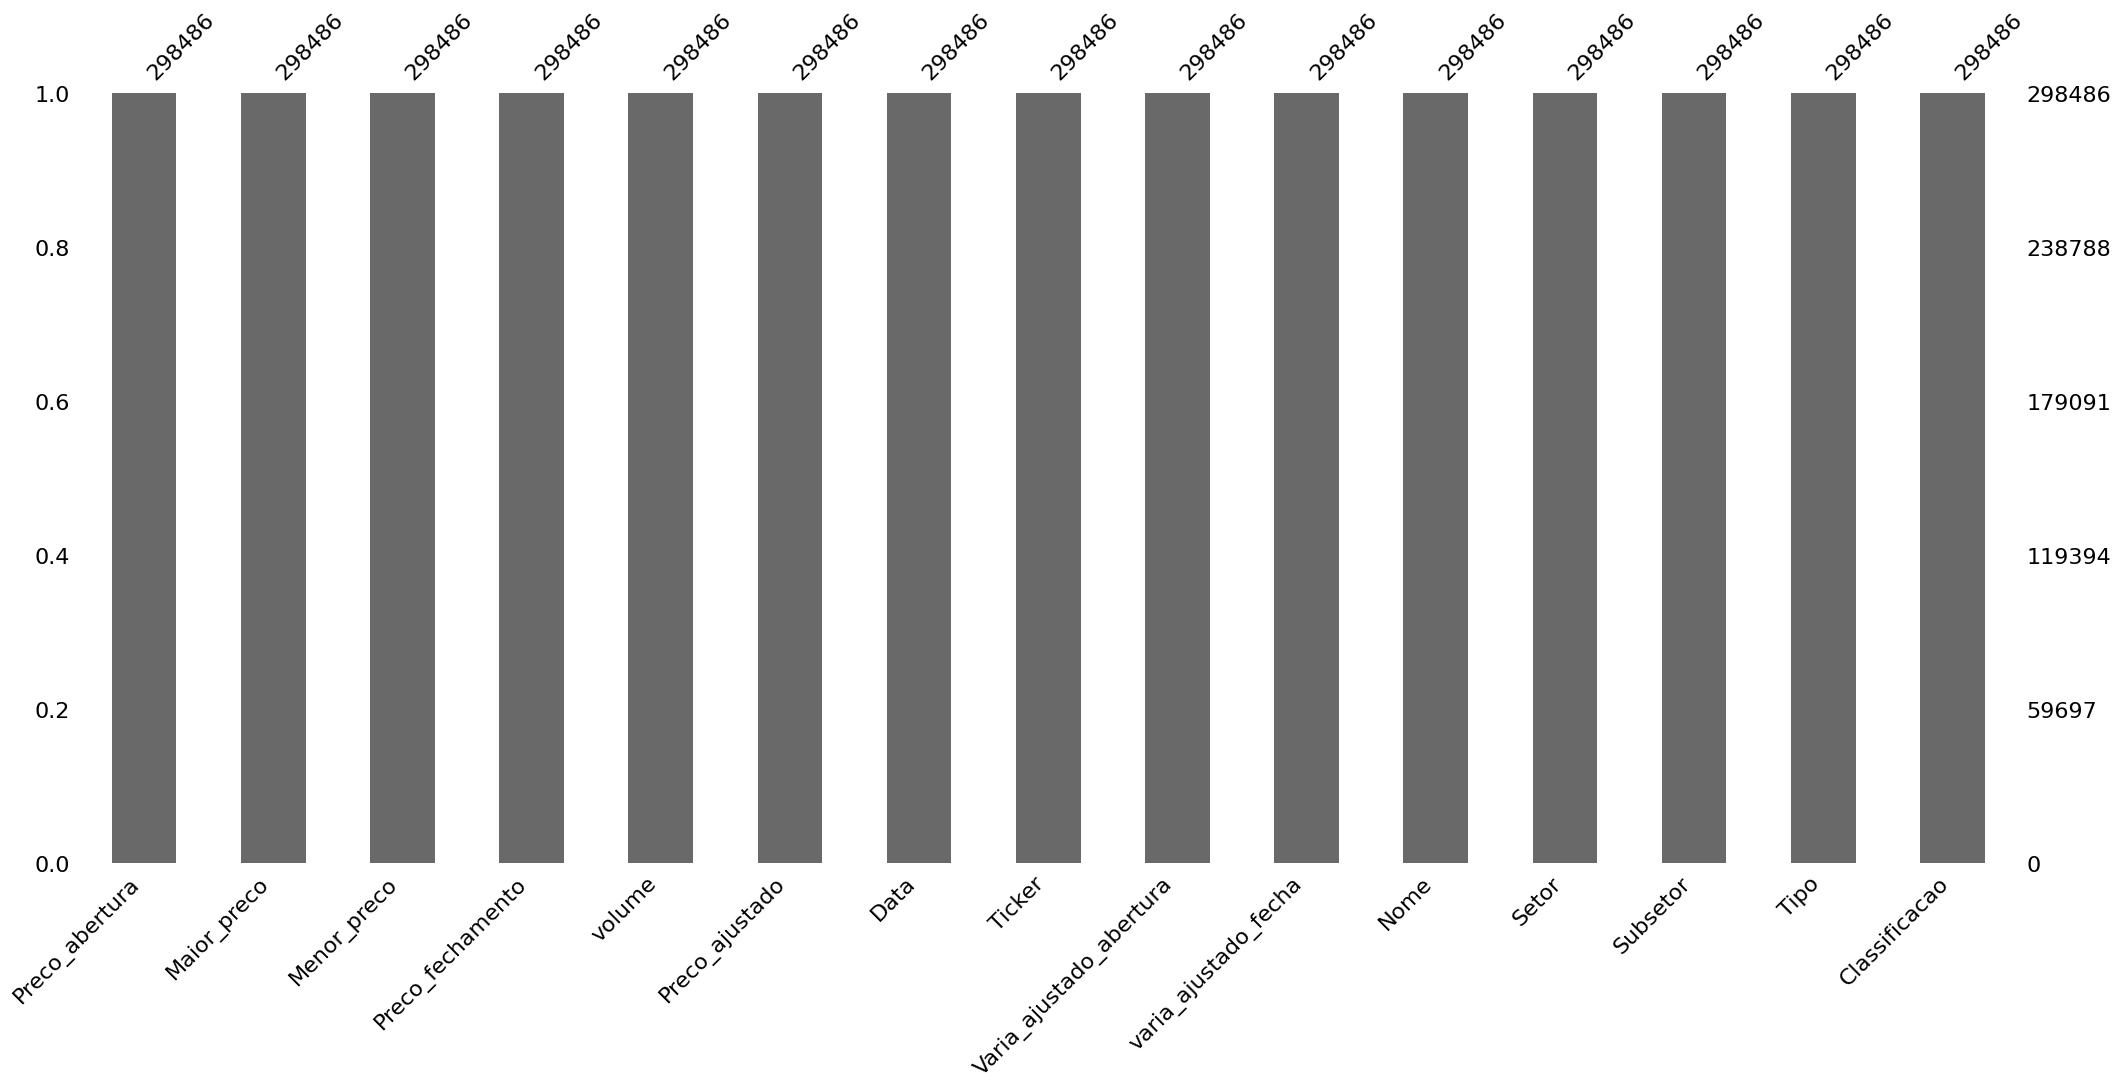

In [12]:
msno.bar(dados);
dados.isnull().sum().sort_values(ascending=False)

 Agora o dataframe possuim 298486 linhas e não possui dados nulos.

# Interpretação dos dados

 Vamos coferir quantos setores e subsetores diferentes existem, depois verificamos quais são os setores e subsetores das empresas que são cotadas na bolsa de valores.

In [13]:
Quant_setor = dados['Setor'].nunique()
Quant_subsetor = dados['Subsetor'].nunique()
Nome_setores = dados['Setor'].unique()
print ('Quantidade de setores diferentes é {}'.format(Quant_setor))
print ('Quantidade de subsetores diferentes é {}\n'.format(Quant_subsetor))

print ('Os setores são:')
i = 1
for nomes in Nome_setores:
    print ('{} - {}'.format(i, nomes))
    i=i+1

Quantidade de setores diferentes é 11
Quantidade de subsetores diferentes é 41

Os setores são:
1 - Saúde
2 - Financeiro
3 - Consumo não Cíclico
4 - Utilidade Pública
5 - Consumo Cíclico
6 - Outros
7 - Bens Industriais
8 - Materiais Básicos
9 - Petróleo, Gás e Biocombustíveis
10 - Tecnologia da Informação
11 - Comunicações


Verificamos agora quantos dias foram realizados pregões, quantas empresas possuem ações negociadas na bolsa de valores e quantos tickers são negociados na bolsa.



In [14]:
pregao = float(dados['Data'].nunique())
print('Quantidade de pregões realizados no periodo {:.2f}'.format(pregao))
num_empresas=dados['Nome'].nunique()
print('Número total de empresas que possuem ações é {}'. format(num_empresas))
print('Número total de ações negociadas é {}'. format(dados['Ticker'].nunique()))

Quantidade de pregões realizados no periodo 834.00
Número total de empresas que possuem ações é 283
Número total de ações negociadas é 375


 Comparando os resultado obtido acima é possível perceber que existe empresas com mais de uma ação cotada na bolsa de valores.

 Número total de ações > Número total de empresas.

 Isso mostra que existe pelo menos uma empresa com mais de uma ação cotada.

  Agora será veriifcando qual foi o valor de abertura no primeiro e o último dia do registrado, verificando quanto foi o ganho nesse período,  e qual foi o valor médio de cada ticker.
   Para facilitar a organizaçao os dados foram organizados em uma lista de dicionarios. 

In [15]:
lista2 = []
i=0
val = dados['Ticker'].unique()

for i in range(len(val)) :
    dicio = {}
  
 # Área de coleta dos dados
    a = (dados[dados['Ticker']==val[i]])
    print(a.iloc[1, 7])
    datafin = str(a.iloc[(len(a))-1, 6])
    datain = str(a.iloc[0, 6])
    valor_aberinic = a.iloc[1, 1]
    valor_aberfin = a.iloc[len(a)-1,1]
    variacao = 100*(valor_aberfin-valor_aberinic)/valor_aberfin
    Setor = a.iloc[len(a)-1,11]
    Nome = a.iloc[len(a)-1,10]
 
  # Cálculo da média dos valores de abertura
    j = 0 
    media = 0
    soma = 0
    for j in range(len(a)):
        soma = soma + a.iloc[j, 1]
        media = soma/len(a)  

  # Área de impressão dos dados
    print('O Nome da empresa é {}'.format(Nome))
    print('A media do preço de abertura no periodo foi R$ {:.2f} '.format(media))
    print('valor na data {} foi de  R$ {:.2f}'. format(datain[:-8], valor_aberinic))
    print('valor na data {} foi de R$ {:.2f} '. format(datafin[:-8], valor_aberfin))
    print('A variação do preço no periodo foi {:.2f}%  ou foi de R$ {} '. format(variacao, datafin[:-8]))
    print('O setor da empresa é {}\n\n'.format(Setor))
    dicio = {'ticker':a.iloc[1, 7],'Nome':a.iloc[1, 10], 'media': media, 'valor_aber_ini':valor_aberinic, 'valor_aber_final': valor_aberfin, 'variacao': variacao, 'Setor': Setor} 
    lista2.append(dicio)
i=+i


AALR3.SA
O Nome da empresa é ALLIAR
A media do preço de abertura no periodo foi R$ 14.05 
valor na data 2018-01-03  foi de  R$ 15.16
valor na data 2021-03-30  foi de R$ 9.03 
A variação do preço no periodo foi -67.88%  ou foi de R$ 2021-03-30  
O setor da empresa é Saúde


ABCB4.SA
O Nome da empresa é ABC BRASIL
A media do preço de abertura no periodo foi R$ 16.83 
valor na data 2018-01-03  foi de  R$ 16.62
valor na data 2021-03-30  foi de R$ 14.95 
A variação do preço no periodo foi -11.17%  ou foi de R$ 2021-03-30  
O setor da empresa é Financeiro


ABEV3.SA
O Nome da empresa é AMBEV S/A
A media do preço de abertura no periodo foi R$ 17.39 
valor na data 2018-01-03  foi de  R$ 21.82
valor na data 2021-03-30  foi de R$ 15.73 
A variação do preço no periodo foi -38.72%  ou foi de R$ 2021-03-30  
O setor da empresa é Consumo não Cíclico


AFLT3.SA
O Nome da empresa é AFLUENTE T
A media do preço de abertura no periodo foi R$ 8.16 
valor na data 2018-01-03  foi de  R$ 4.98
valor na data 2

 Após organizado em uma lista de dicionários, organizamos esses dicionarios de maneira a observar quais os tickers que tiveram maiores valorizações no período e os que possuem maiores médias.
 
 Foram escolhidos 50 melhores tickers para analise com base no ganho e os 50 melhores tickers com base na média de valores.

In [16]:
# reordenação da lista2 de maneira mostrando quais tickers tiveram os
# valores medios mais altos e quai tickers tiveram os maiores ganhos 

lista_ordenada_media = sorted(lista2, key=lambda x: x['media'], reverse=True)
lista_ordenada_ganho = sorted(lista2, key=lambda x: x['variacao'], reverse=True)

quant_tickers = 50 # Quantidade de tickers se serão analizados 

# Ordenação pela media do valor do ticker
i=0
print('Ordenação pela media do valor do ticker \n')
for i in range(quant_tickers):
    #impressão dos tickers de que tiveram os maiores ganhos
    print(' {}° ticker foi  {} \n '.format(i+1, lista_ordenada_media[i]))
    i=+1


# Ordenaçao pelo ganho do ticker 
i=0
print('Ordenação pela ganho do ticker \n')
for i in range(quant_tickers):
    #impressão dos tickers de que tiveram os maiores ganhos
    print(' {}° ticker foi  {} \n '.format(i+1, lista_ordenada_ganho[i]))
    i=+1

Ordenação pela media do valor do ticker 

 1° ticker foi  {'ticker': 'EEEL4.SA', 'Nome': 'CEEE-GT', 'media': 329.2289698492447, 'valor_aber_ini': 160.0, 'valor_aber_final': 600.0, 'variacao': 73.33333333333333, 'Setor': 'Utilidade Pública'} 
 
 2° ticker foi  {'ticker': 'EEEL3.SA', 'Nome': 'CEEE-GT', 'media': 297.91966080402017, 'valor_aber_ini': 165.0, 'valor_aber_final': 547.5, 'variacao': 69.86301369863014, 'Setor': 'Utilidade Pública'} 
 
 3° ticker foi  {'ticker': 'BMKS3.SA', 'Nome': 'BIC MONARK', 'media': 265.47336683417063, 'valor_aber_ini': 350.0, 'valor_aber_final': 242.24, 'variacao': -44.48480845442536, 'Setor': 'Consumo Cíclico'} 
 
 4° ticker foi  {'ticker': 'PPAR3.SA', 'Nome': 'POLPAR', 'media': 250.01999999999714, 'valor_aber_ini': 250.02, 'valor_aber_final': 250.02, 'variacao': 0.0, 'Setor': 'Outros'} 
 
 5° ticker foi  {'ticker': 'MOAR3.SA', 'Nome': 'MONT ARANHA', 'media': 177.21604271356784, 'valor_aber_ini': 148.0, 'valor_aber_final': 249.99, 'variacao': 40.797631905

 Agora que já temos os tickers que mais aumentaram o seu valor durante o perído, vamos verificar quais setores esses tickers pertencem e verificar se algum setor está em crescimento acelerado. Para verificar esse comportamento será utilizar um gráfico em barras.

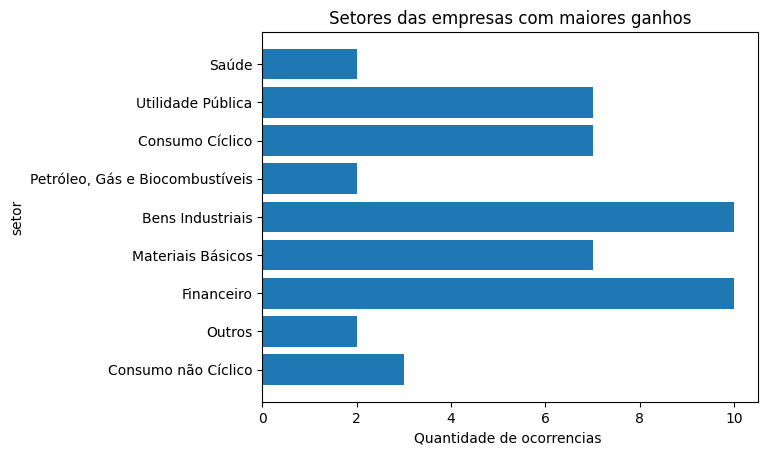

In [18]:
# importação do pyplot
import matplotlib.pyplot as plt

# Veriicando a quantidade de vezes que cada setor apareceu  nos
# nos tickers mais valorizados 
lista_ganho = []
i=0
for i in range(quant_tickers):
    a = (dados[dados['Ticker']==lista_ordenada_ganho[i]['ticker']])
    lista_ganho.append(a.iloc[1, 11])
    i=+1

# separar os nomes dos setores em uma lista 
# e a quantidade de cada setor na outra lista

contagem = {}
for item in lista_ganho:
    if item in contagem:
        contagem[item] += 1
    else:
        contagem[item] = 1
quant = list(contagem.values())
setores = list(contagem.keys())


# Verificando a quantidade de empresas

lista_nomes_ganho = []
i=0
for i in range(quant_tickers):
    b = (dados[dados['Nome']==lista_ordenada_ganho[i]['Nome']])
    lista_nomes_ganho.append(b.iloc[1, 10])
    i=+1

# separar os nomes das empresas em uma lista 
# e a quantidade que cada empresa aparece na lista

contagem_ganho = {}
for item in lista_nomes_ganho:
    if item in contagem:
        contagem_ganho[item] += 1
    else:
        contagem_ganho[item] = 1
quant_nome = list(contagem_ganho.values())
setores_nome = list(contagem_ganho.keys())

# plotando em um gráfico de barras horizontal 
#criando o gráfico
plt.barh(setores, quant)

# criando título do gráfico e legenda
plt.title("Setores das empresas com maiores ganhos")
plt.xlabel("Quantidade de ocorrencias ")
plt.ylabel("setor");

 Analizando o gráfico acima é possível perceber que a maior parte das empresas que tiveram valorização nesse período  foram as empresas do setor de bens industriais, seguido por empresas do setor financeiro e empresas de utilidades públicas e consumo cíclico 

 Vamos avaliar também quais foram os setores em que os tickers tiveram o valores médios mais altos. Para ajudar na visualização vamos utilizar também um gráfico de barras horizontais.

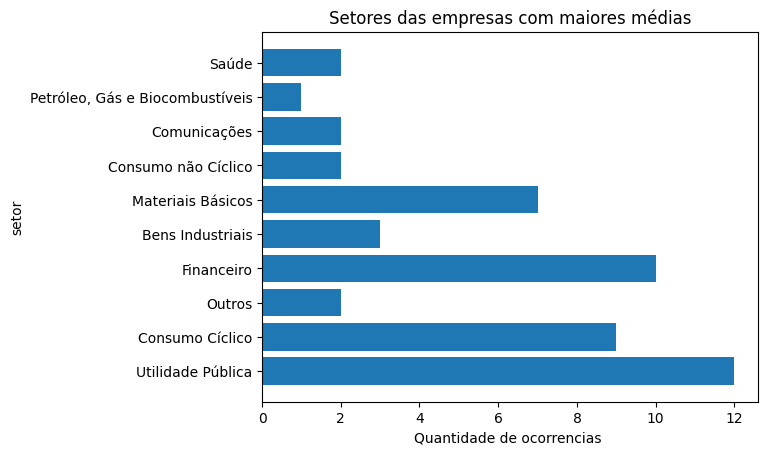

In [19]:
# importação do pyplot
import matplotlib.pyplot as plt

# Veriicando a quantidade de vezes que cada setor apareceu  nos
# nos tickers mais valorizados 
lista_media = []
i=0
for i in range(quant_tickers):
    a = (dados[dados['Ticker']==lista_ordenada_media[i]['ticker']])
    lista_media.append(a.iloc[1, 11])
    i=+1

# separar os nomes dos setores em uma lista 
# e a quantidade de cada setor na outra lista

contagem_media = {}
for item in lista_media:
    if item in contagem_media:
        contagem_media[item] += 1
    else:
        contagem_media[item] = 1
quant = list(contagem_media.values())
setores = list(contagem_media.keys())


# Verificando os nomes das empresas

lista_nomes_media = []
i=0
for i in range(quant_tickers):
    b = (dados[dados['Nome']==lista_ordenada_media[i]['Nome']])
    lista_nomes_media.append(b.iloc[1, 10])
    i=+1

# separar os nomes das empresas em uma lista 
# e a quantidade que cada empresa aparece na lista

contagem = {}
for item in lista_nomes_media:
    if item in contagem:
        contagem_media[item] += 1
    else:
        contagem_media[item] = 1
quant_nome = list(contagem.values())
setores_nome = list(contagem.keys())

# plotando em um gráfico de barras horizontal 
#criando o gráfico
plt.barh(setores, quant)

# criando título do gráfico e legenda
plt.title("Setores das empresas com maiores médias")
plt.xlabel("Quantidade de ocorrencias ")
plt.ylabel("setor");

 Quando avaliamos os setores que os tickers tiveram valores médios mais elevados percebemos que, empresas do setor de utilidade pública tiveram o maior número seguida das empresas do setor financeiro é consumo cíclico.

 Com Base nos gráficos acima podemos chegar as seguintes  conclução:

1.   O setor das empresas que tiveram os maiores ganhos em suas ações no período avaliado foram:

 1 - Bens industriais

 2 - Financeiro

 3 - Consumo cíclico 
 
 4 - Utilidade pública


2.   O setor das empresas que tiveram os maiores valores médios nesse período foram:

 1 - Utilidade pública

 2 - Financeiro

 3 - Consumo cíclico 

 Com base nessas informações a analise dos dados ficará restrita as empresas que tiveram os melhores resultados.

In [20]:
 # Veruficando os nomes dos itens em cada grupo, lista_nome_media
 # e listanomes_ganho

print('Empresas com maiores medias de valores ')
print(lista_nomes_media)
print('\nEmpresas com maiores ganhos ')
print(lista_nomes_ganho)

# Unindo os grupos retirando os tickers repetidos
finalistas = lista_nomes_media + lista_nomes_ganho

lista_unica = list(set(finalistas))
print('\nNúmero de tickers diferentes entre as empresas com maiores ganho e maiores valores médios')
print(len(lista_unica))
print('\nEmpresas com maiores medias de valores e ganhos ')
print(lista_unica)



Empresas com maiores medias de valores 
['CEEE-GT', 'CEEE-GT', 'BIC MONARK', 'POLPAR', 'MONT ARANHA', 'MINASMAQUINA', 'METAL IGUACU', 'COMGAS', 'CONST A LIND', 'RIOSULENSE', 'GENERALSHOPP', 'BAHEMA', 'ENCORPAR', 'TEKNO', 'P.ACUCAR-CBD', 'COR RIBEIRO', 'MANGELS INDL', 'ENCORPAR', 'CEEE-D', 'TELEBRAS', 'CONST A LIND', 'ELETROPAR', 'CEEE-D', 'METALFRIO', 'NORD BRASIL', 'METAL IGUACU', 'COSAN', 'VALE', 'SPTURIS', 'B2W DIGITAL', 'AREZZO CO', 'CEB', 'PORTO SEGURO', 'COELCE', 'INTERMEDICA', 'BTGP BANCO', 'EXCELSIOR', 'DASA', 'PAR AL BAHIA', 'SEG AL BAHIA', 'SEG AL BAHIA', 'MELHOR SP', 'CELESC', 'PAR AL BAHIA', 'MELHOR SP', 'CEG', 'TELEF BRASIL', 'CELESC', 'SABESP', 'INVEST BEMGE']

Empresas com maiores ganhos 
['ODERICH', 'CEMEPE', 'BRB BANCO', 'SANSUY', 'IGB S/A', 'TAURUS ARMAS', 'INEPAR', 'BRB BANCO', 'TAURUS ARMAS', 'PETRORIO', 'MMX MINER', 'MAGAZ LUIZA', 'CEMEPE', 'EXCELSIOR', 'CEB', 'ACO ALTONA', 'GPC PART', 'PPLA', 'EMAE', 'RIOSULENSE', 'WLM IND COM', 'KARSTEN', 'BANCO PAN', 'TREVISA', 

 Verificando os tickers que tiveram maiores valores médios e maiores ganhos, temos um total de 79 tickers, para avalizar quais ações tem as melhores chances de continuar peformando bem a analíse se restrigirá as empresas dos melhores setores.
 
 Seno esses setores :
1.   Bens industriais
2.   Financeiro
3.   Consumo cíclico 
4.   Utilidade pública

In [25]:
Bens_industriais = []
Financeiro = []
Consumo_cilico = []
Utilidade_publica = []

i = 0
for nome in lista_unica:
    a = (dados[dados['Nome']==lista_unica[i]])
    i=i+1

    if a.iloc[0,11] == 'Bens Industriais':
        Bens_industriais.append(a.iloc[0,7])
    elif a.iloc[0,11] == 'Financeiro':
        Financeiro.append(a.iloc[0,7])
    elif a.iloc[0,11] == 'Consumo Cíclico':
        Consumo_cilico.append(a.iloc[0,7])
    elif a.iloc[0,11] == 'Utilidade Pública':
        Utilidade_publica.append(a.iloc[0,7])
 
print(' Tickers do setor bens industriais ')    
print('Quantidade de empresas {}'.format(len(Bens_industriais)))
print(Bens_industriais)
print('\n Tickers do setor Financeiro ')
print('Quantidade de empresas {}'.format(len(Financeiro)))
print(Financeiro)
print(' \nTickers do setor Consumo_cilico ') 
print('Quantidade de empresas {}'.format(len(Consumo_cilico)))
print(Consumo_cilico)
print(' \nTickers de Utilidade_publica ') 
print('Quantidade de empresas {}'.format(len(Utilidade_publica)))
print(Utilidade_publica)

 Tickers do setor bens industriais 
Quantidade de empresas 11
['ROMI3.SA', 'EALT3.SA', 'TASA3.SA', 'WLMM3.SA', 'FRIO3.SA', 'WEGE3.SA', 'LUXM3.SA', 'RSUL4.SA', 'LOGN3.SA', 'MMAQ3.SA', 'INEP4.SA']

 Tickers do setor Financeiro 
Quantidade de empresas 15
['BPAC3.SA', 'APER3.SA', 'CORR3.SA', 'PEAB3.SA', 'BPAN4.SA', 'GSHP3.SA', 'PPLA11.SA', 'PSSA3.SA', 'CSAB3.SA', 'BSLI3.SA', 'MERC3.SA', 'BNBR3.SA', 'BMEB3.SA', 'MOAR3.SA', 'IGBR3.SA']
 
Tickers do setor Consumo_cilico 
Quantidade de empresas 13
['TEKA3.SA', 'AHEB3.SA', 'MGLU3.SA', 'BTOW3.SA', 'ECPR3.SA', 'TRIS3.SA', 'DOHL3.SA', 'ARZZ3.SA', 'BMKS3.SA', 'CTKA3.SA', 'JHSF3.SA', 'CALI3.SA', 'BAHI3.SA']
 
Tickers de Utilidade_publica 
Quantidade de empresas 14
['CEGR3.SA', 'COCE3.SA', 'CLSC3.SA', 'ENEV3.SA', 'CGAS3.SA', 'CEED3.SA', 'EEEL3.SA', 'LIPR3.SA', 'CEPE3.SA', 'ENMT3.SA', 'CEBR3.SA', 'GPAR3.SA', 'SBSP3.SA', 'EMAE4.SA']


# Gráficos dos tickers 

 Gráficos dos tickers do setor de Bens industriais  

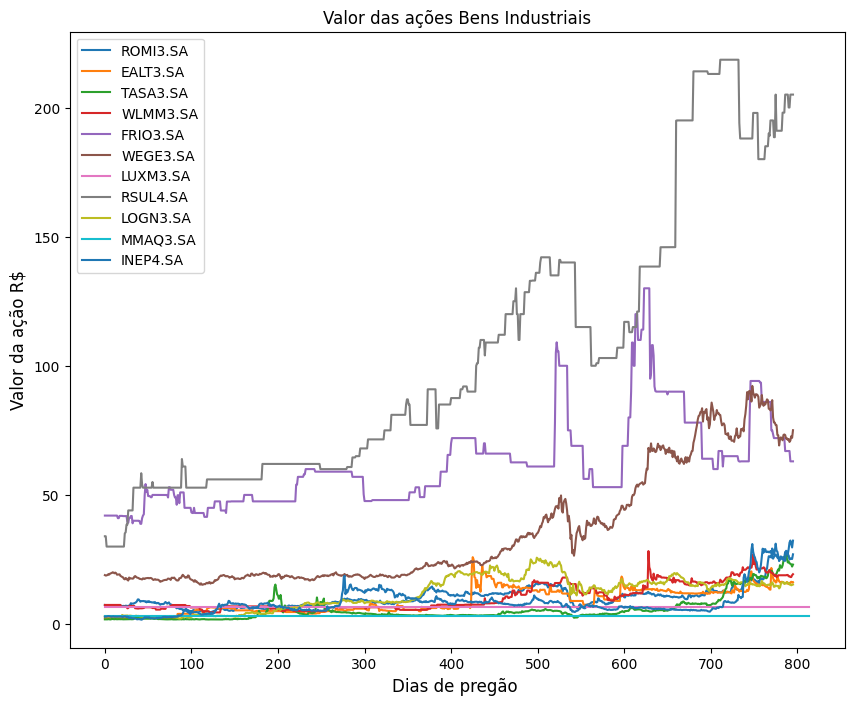

In [26]:
import numpy as np
import seaborn as sns
legenda = []
i=0
t = np.arange(0., 796, 1)
plt.figure(figsize = (10,8))
for nomes in Bens_industriais:
    legenda.append(Bens_industriais[i])
    a=((dados[dados['Ticker']==Bens_industriais[i]]).iloc[0:len(dados['Ticker']), 3:4])
    t = np.arange(0.,len(a), 1)
    plt.plot(t, a)
    i+=1
plt.title('Valor das ações Bens Industriais')
plt.legend(legenda,fontsize = 10, loc='upper left');
plt.xlabel('Dias de pregão ', fontsize = 12)
plt.ylabel('Valor da ação R$', fontsize = 12)
plt.show()


 Avaliando o resultado do gráficos acima percebemos que:



1.   Os ticker que tiveram os maiores valor no final do período de analíse foram o WLMM3.SA, FRIO3.SA E WEGE3.SA.

2.   É possível perceber que por volta do pregão 580 as princiais empresas sofreram uma baixa nos valores das ações.





Gráficos dos tickers do Setor financeiro

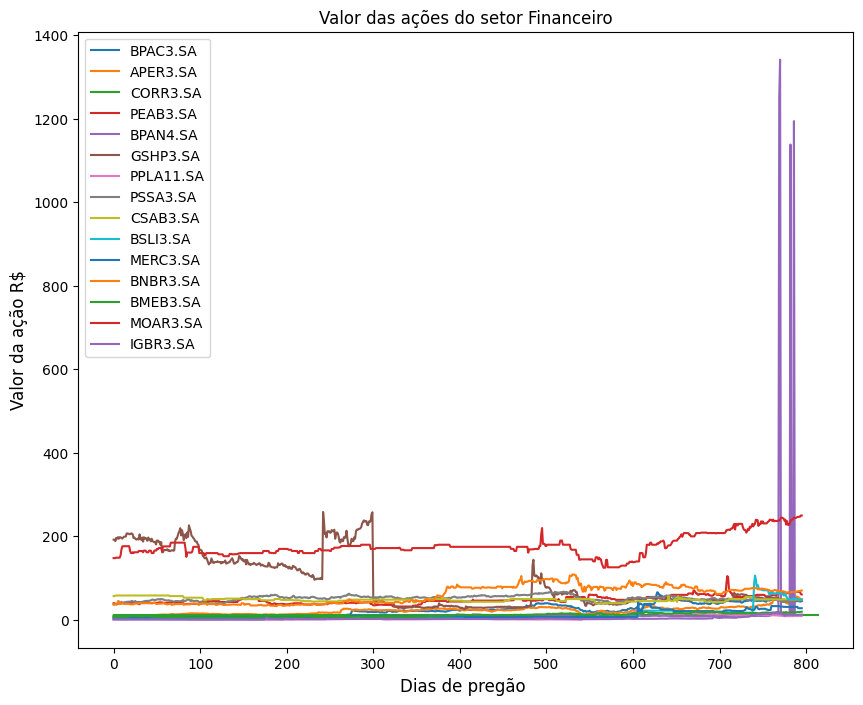

In [27]:
legenda = []
i=0
t = np.arange(0., 796, 1)
plt.figure(figsize = (10,8))
for nomes in Financeiro:
    legenda.append(Financeiro[i])
    a=((dados[dados['Ticker']==Financeiro[i]]).iloc[0:len(dados['Ticker']), 3:4])
    t = np.arange(0.,len(a), 1)
    plt.plot(t, a)
    i+=1
plt.title('Valor das ações do setor Financeiro')
plt.legend(legenda,fontsize = 10, loc='upper left');
plt.xlabel('Dias de pregão ', fontsize = 12)
plt.ylabel('Valor da ação R$', fontsize = 12)
plt.show()

 No gráfico acima é possível perceber que os valores da ação BPAN4.SA tiveram em alguns dias valores que não são compativel com o comportamento das ações, esse comportamento indica erro de coleta dos dados.
 Pesquisando em sites especializados no assunto podemos ver que esses dados realmente estão errados.
 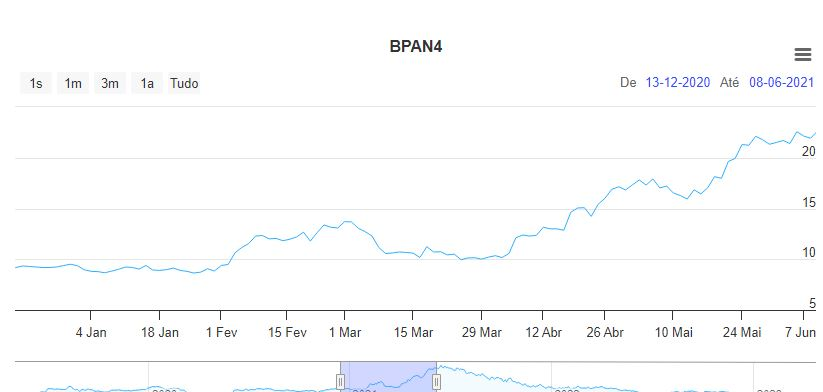
 
 Fonte : https://www.infomoney.com.br/cotacoes/b3/acao/banco-pan-bpan4/grafico/ 
 data de acesso 29 de abril 2023.
 
  Por isso os valores nesses dias serão desconsiderados.


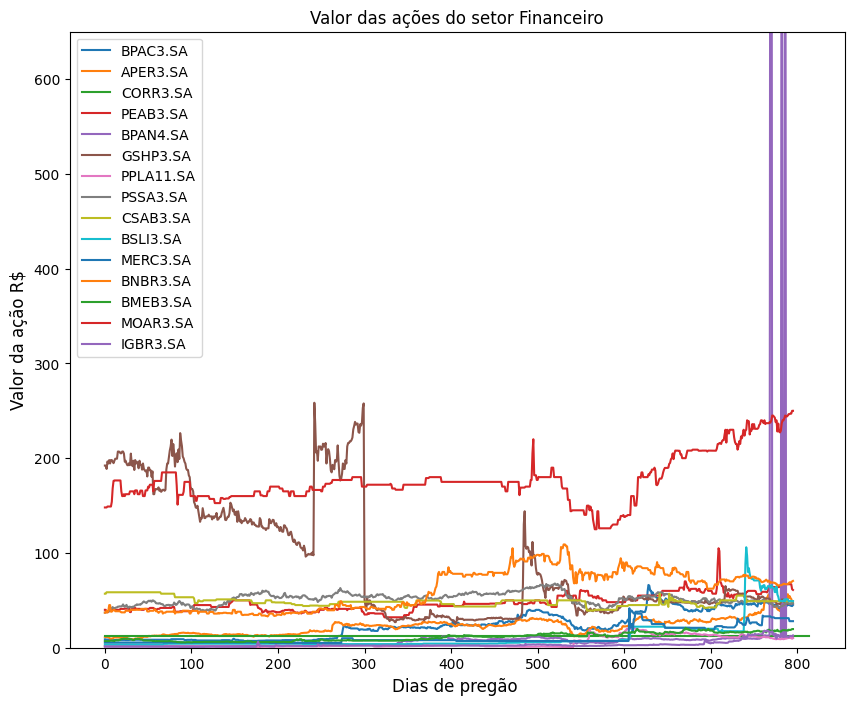

In [28]:
# Gráfico com os valores das ações desconsiderando os valores com erros 

legenda = []
i=0
t = np.arange(0., 796, 1)
plt.figure(figsize = (10,8))
for nomes in Financeiro:
    legenda.append(Financeiro[i])
    a=((dados[dados['Ticker']==Financeiro[i]]).iloc[0:len(dados['Ticker']), 3:4])
    t = np.arange(0.,len(a), 1)
    plt.plot(t, a)
    i+=1
plt.title('Valor das ações do setor Financeiro')
plt.legend(legenda,fontsize = 10, loc='upper left');
plt.xlabel('Dias de pregão ', fontsize = 12)
plt.ylabel('Valor da ação R$', fontsize = 12)
plt.ylim(0,650)
plt.show()

Avaliando o resultado do gráficos acima percebemos que:



1.   Apenas um ticker se destaca positivamente nesse setor, o ticker MOAR3.SA.

2.   É possível perceber que por volta do pregão 580 a ação de destaque sofreu uma baixa no seu valor, como também foi observado no gráfico anterior.

3.   É possível observar um destaque negativo, a ação GSHP3.SA perdeu muito valor sendo uma escola ruim.




Gráficos dos tickers do Setor Consumo cilico

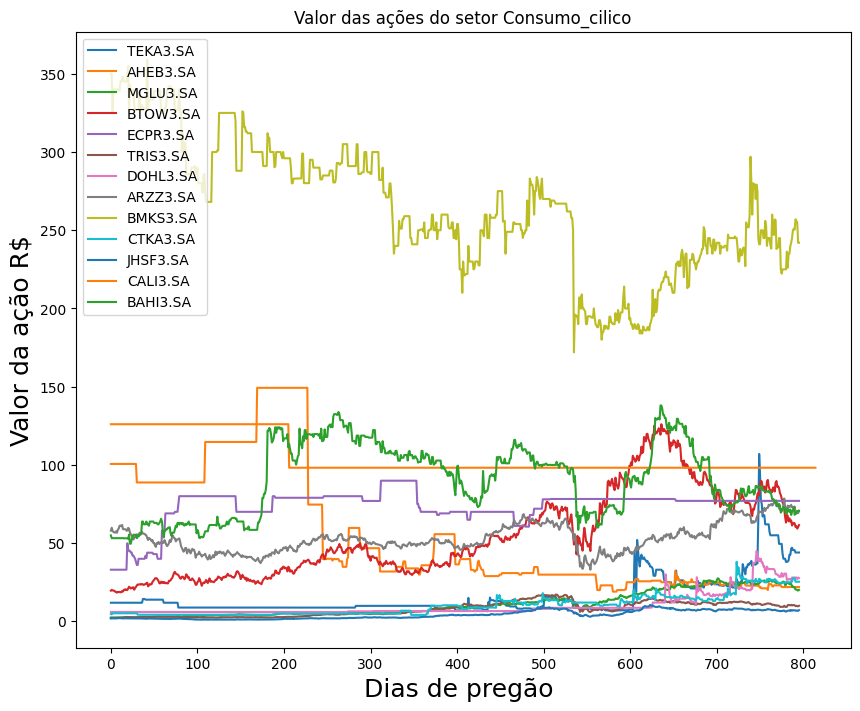

In [29]:
legenda = []
i=0
t = np.arange(0., 796, 1)
plt.figure(figsize = (10,8))
for nomes in Consumo_cilico:
    legenda.append(Consumo_cilico[i])
    a = ((dados[dados['Ticker']==Consumo_cilico[i]]).iloc[0:len(dados['Ticker']), 3:4])
    t = np.arange(0.,len(a), 1)
    plt.plot(t, a)
    i+=1
plt.title('Valor das ações do setor Consumo_cilico')
plt.legend(legenda,fontsize = 10, loc='upper left');
plt.xlabel('Dias de pregão ', fontsize = 18)
plt.ylabel('Valor da ação R$', fontsize = 18)
plt.show()

Avaliando o resultado do gráficos acima percebemos que:


1.   Nesse setor os tickeres que se destacaram positivamente foram, TEKA3.SA, BTOW3.SA e ECPR3.SA.

2.   É possível perceber que por volta do pregão 580 as ações de destaque sofreram uma baixa nos seus valores, como também foi observado nos gráficos anteriores.

3.   É possível observar um destaque negativo, a ação BMKS3.SA perdeu muito valor sendo uma escola ruim.


Gráficos dos tickers do Setor Utilidade publica

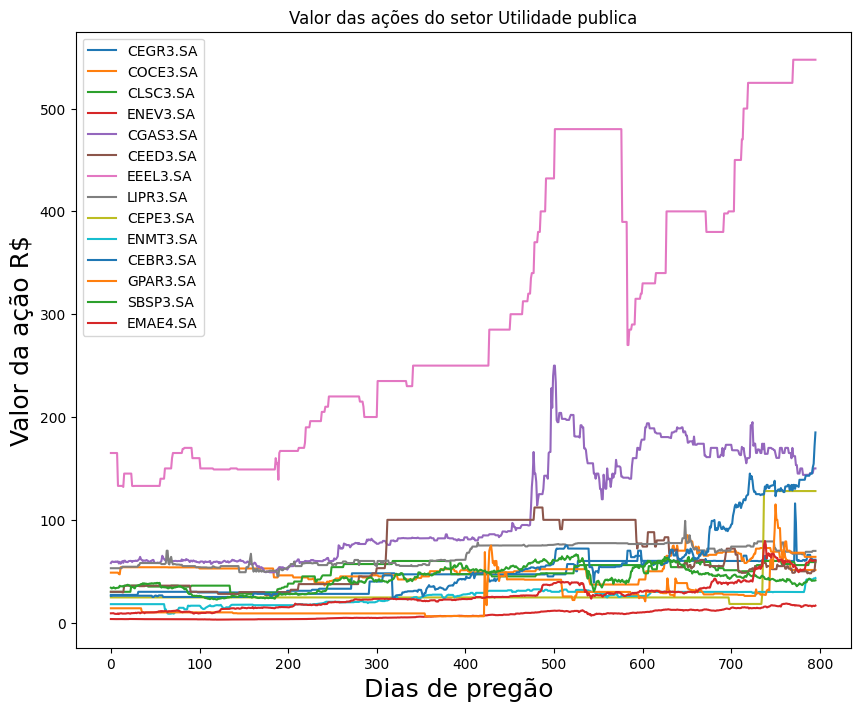

In [30]:
legenda = []
i=0
t = np.arange(0., 796, 1)
plt.figure(figsize = (10,8))
for nomes in Utilidade_publica:
    legenda.append(Utilidade_publica[i])
    a = ((dados[dados['Ticker']==Utilidade_publica[i]]).iloc[0:len(dados['Ticker']), 3:4])
    t = np.arange(0.,len(a), 1)
    plt.plot(t, a)
    i+=1
plt.title('Valor das ações do setor Utilidade publica')
plt.legend(legenda,fontsize = 10);
plt.xlabel('Dias de pregão ', fontsize = 18)
plt.ylabel('Valor da ação R$', fontsize = 18)
plt.show()

valiando o resultado do gráficos acima percebemos que:


1.   Nesse setor os tickeres que se destacaram positivamente foram, EEEL3.SA, CGAS3.SA e CEBR3.SA.

2.   É possível perceber que por volta do pregão 580 as ações de destaque sofreram uma baixa nos seus valores, como também foi observado nos gráficos anteriores.


#  Conclusão

 Baseado nos gráficos acima podemos perceber que:


1.    As melhores ações para investir com base no crescimento do valor das ações foram:

*   No setor de Utilidade pública:

EEEL3.SA

CGAS3.SA 

CEBR3.SA

*   No setor de Consumo cilico

TEKA3.SA

BTOW3.SA
 
ECPR3.SA.


*   setor Financeiro

MOAR3.SA 


*   Bens industriais 

WLMM3.SA

FRIO3.SA

WEGE3.SA



2.   Podemos perceber que entre os pregões de N° 580 a 600 em torno da data 25 de maio de 2018 a 06 de junho de 2018 as empresas de destaque perderam valor de mercado.
 Procurando notícias sobre esse período na internet encontramos:
 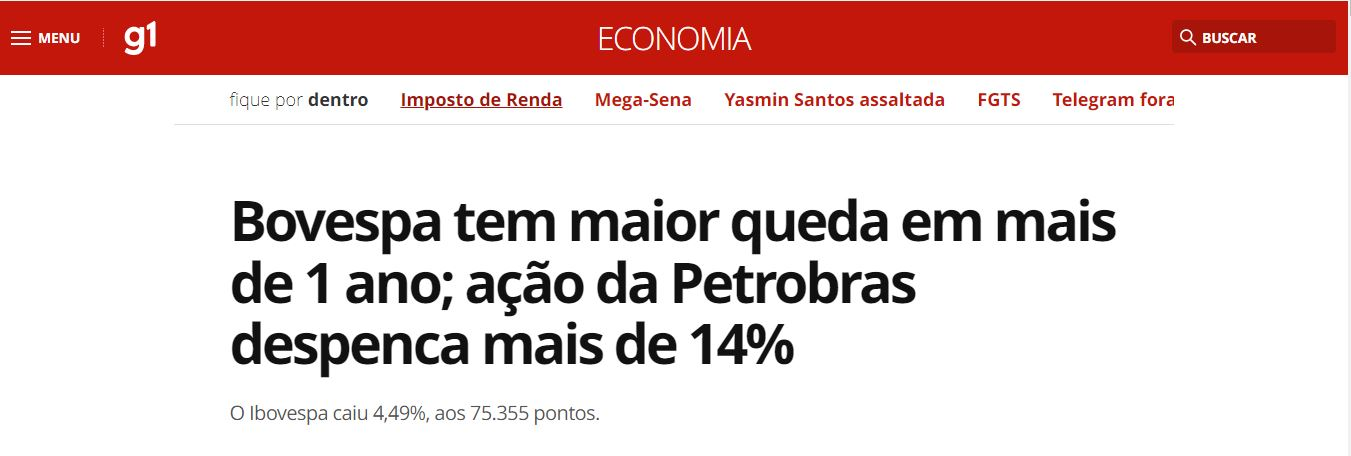


   O que está de acordo com os dados do dataframe

